# Benchmarking Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
# read in csv files
lp_benchmarking = pd.read_csv('logs/lp_benchmarking.csv')
sr_benchmarking = pd.read_csv('logs/sr_benchmarking.csv')

### LP Benchmarking

In [33]:
# assess if there's any violations
print(lp_benchmarking["NViolations"].value_counts())

# basic cleaning
lp_benchmarking["isWelfareOptimized"] = lp_benchmarking["Solver"].apply(lambda x: x.find("Welfare") != -1)
lp_nplayers = lp_benchmarking[:80]
lp_nactions = lp_benchmarking[80:]

NViolations
0    160
Name: count, dtype: int64


Text(0, 0.5, 'Welfare Difference (Welfare - Non-Welfare)')

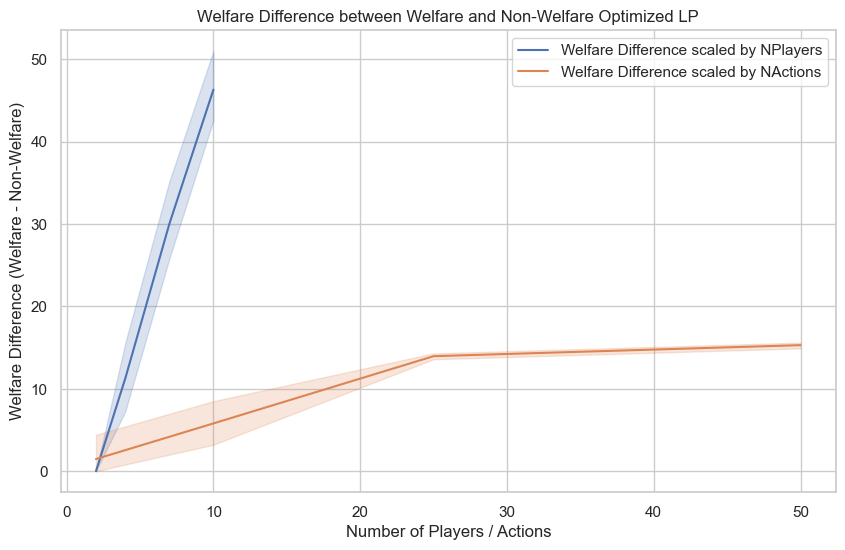

In [40]:
# welfare analysis
lp_welfare_nplayers = lp_nplayers[lp_nplayers["isWelfareOptimized"]].copy()
lp_non_welfare_nplayers = lp_nplayers[~lp_nplayers["isWelfareOptimized"]].copy()
lp_welfare_nactions = lp_nactions[lp_nactions["isWelfareOptimized"]].copy()
lp_non_welfare_nactions = lp_nactions[~lp_nactions["isWelfareOptimized"]].copy()

# diff the welfare and non-welfare
lp_welfare_nplayers["diff"] = lp_welfare_nplayers["Welfare"] - lp_non_welfare_nplayers["Welfare"].values
lp_welfare_nactions["diff"] = lp_welfare_nactions["Welfare"] - lp_non_welfare_nactions["Welfare"].values

# plot the welfare difference
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.lineplot(x="NPlayers", y="diff", data=lp_welfare_nplayers, label="Welfare Difference scaled by NPlayers")
sns.lineplot(x="MaxNActions", y="diff", data=lp_welfare_nactions, label="Welfare Difference scaled by NActions")
plt.title("Welfare Difference between Welfare and Non-Welfare Optimized LP")
plt.xlabel("Number of Players / Actions")
plt.ylabel("Welfare Difference (Welfare - Non-Welfare)")

Text(0, 0.5, 'Runtime Difference (Welfare - Non-Welfare)')

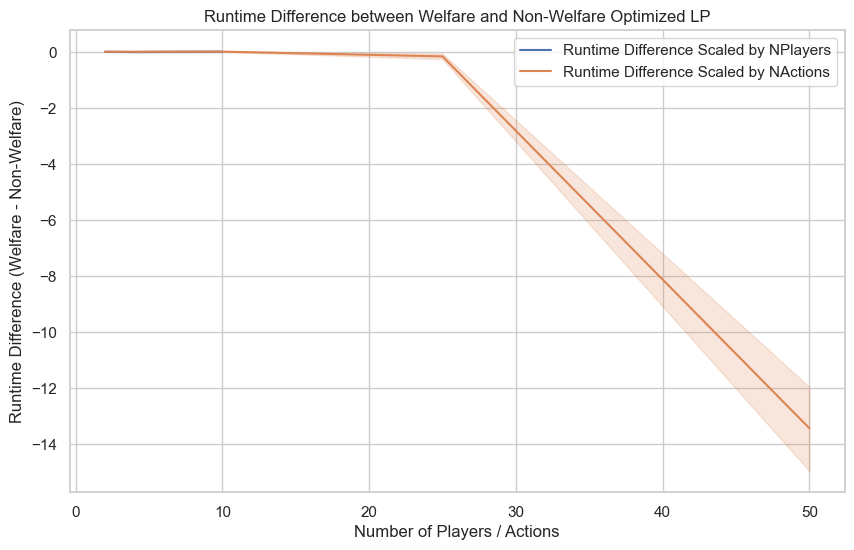

In [43]:
# welfare runtime analysis
# diff the welfare and non-welfare
lp_welfare_nplayers["rt_diff"] = lp_welfare_nplayers["Runtime"] - lp_non_welfare_nplayers["Runtime"].values
lp_welfare_nactions["rt_diff"] = lp_welfare_nactions["Runtime"] - lp_non_welfare_nactions["Runtime"].values

# plot the welfare runtime difference
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.lineplot(x="NPlayers", y="rt_diff", data=lp_welfare_nplayers, label="Runtime Difference Scaled by NPlayers")
sns.lineplot(x="MaxNActions", y="rt_diff", data=lp_welfare_nactions, label="Runtime Difference Scaled by NActions")
plt.title("Runtime Difference between Welfare and Non-Welfare Optimized LP")
plt.xlabel("Number of Players / Actions")
plt.ylabel("Runtime Difference (Welfare - Non-Welfare)")

Text(0.5, 1.0, 'Welfare Comparison between Welfare and Non-Welfare Optimized LP scaled by NActions')

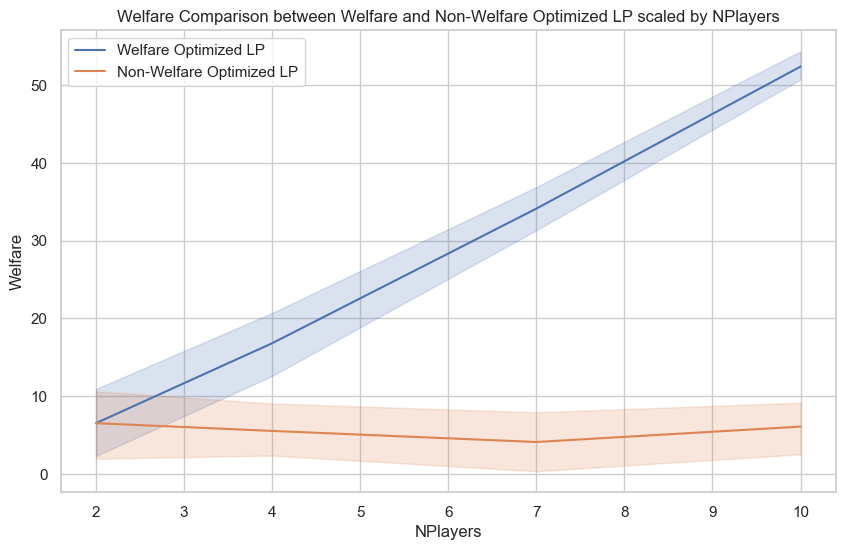

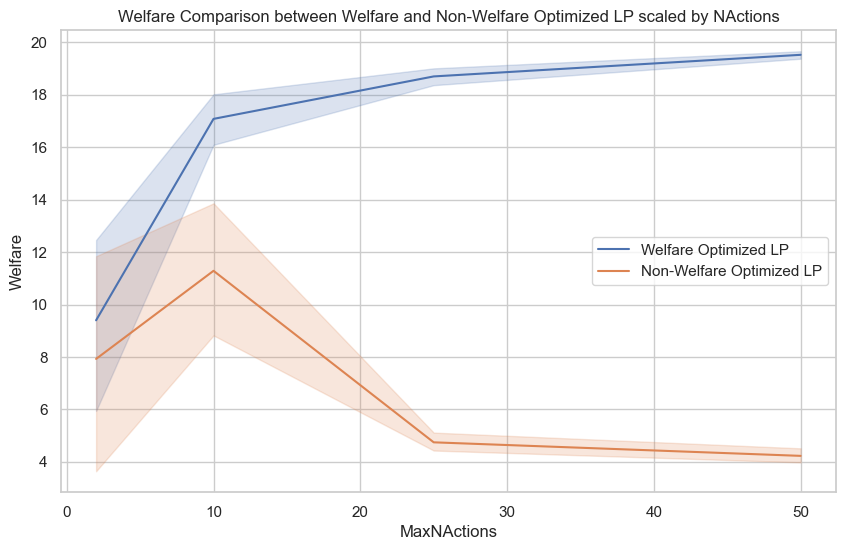

In [38]:
# plot welfare nplayers
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.lineplot(x="NPlayers", y="Welfare", data=lp_welfare_nplayers, label="Welfare Optimized LP")
sns.lineplot(x="NPlayers", y="Welfare", data=lp_non_welfare_nplayers, label="Non-Welfare Optimized LP")
plt.title("Welfare Comparison between Welfare and Non-Welfare Optimized LP scaled by NPlayers")


# plot welfare nactions
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.lineplot(x="MaxNActions", y="Welfare", data=lp_welfare_nactions, label="Welfare Optimized LP")
sns.lineplot(x="MaxNActions", y="Welfare", data=lp_non_welfare_nactions, label="Non-Welfare Optimized LP")
plt.title("Welfare Comparison between Welfare and Non-Welfare Optimized LP scaled by NActions")

Text(0.5, 1.0, 'Runtime Comparison between Welfare and Non-Welfare Optimized LP scaled by NActions')

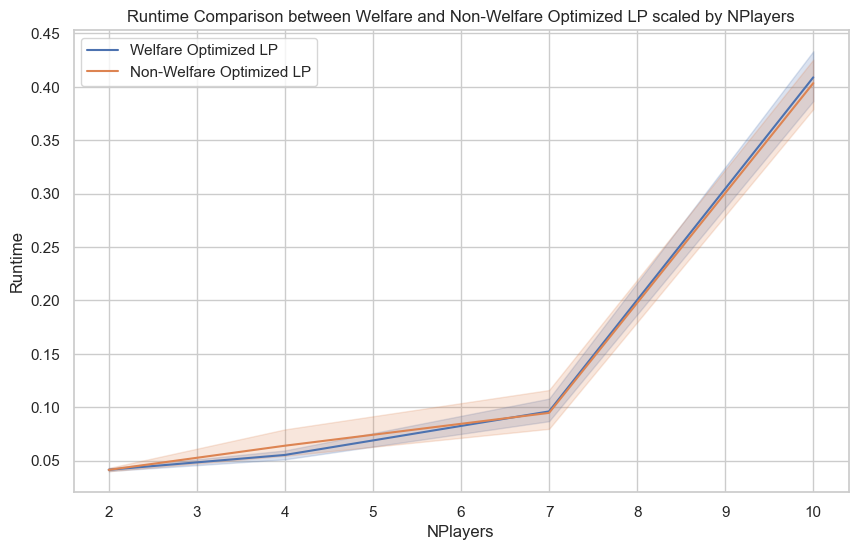

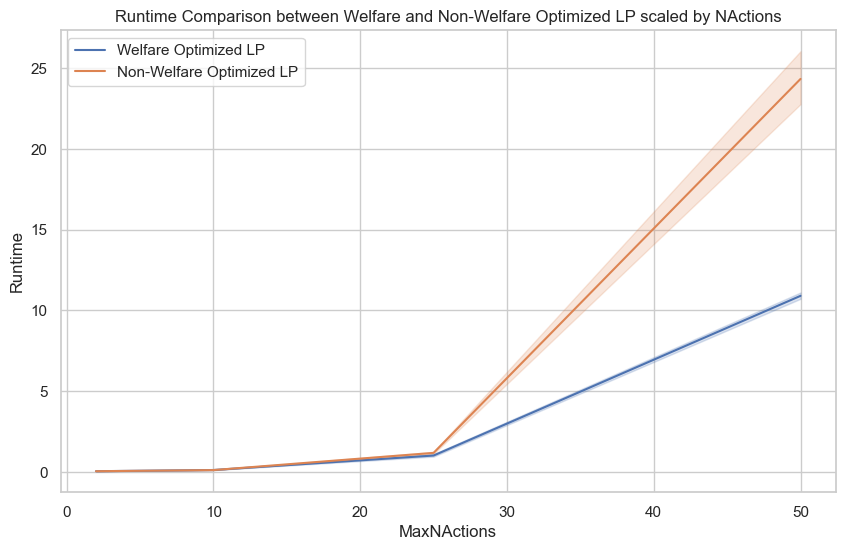

In [39]:
# plot runtime nplayers
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.lineplot(x="NPlayers", y="Runtime", data=lp_welfare_nplayers, label="Welfare Optimized LP")
sns.lineplot(x="NPlayers", y="Runtime", data=lp_non_welfare_nplayers, label="Non-Welfare Optimized LP")
plt.title("Runtime Comparison between Welfare and Non-Welfare Optimized LP scaled by NPlayers")

# plot runtime nactions
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.lineplot(x="MaxNActions", y="Runtime", data=lp_welfare_nactions, label="Welfare Optimized LP")
sns.lineplot(x="MaxNActions", y="Runtime", data=lp_non_welfare_nactions, label="Non-Welfare Optimized LP")
plt.title("Runtime Comparison between Welfare and Non-Welfare Optimized LP scaled by NActions")

### SR Benchmarking

In [45]:
split_index = 15 * 4
sr_nplayers = sr_benchmarking[:split_index]
sr_nactions = sr_benchmarking[split_index:]

Text(0, 0.5, 'Number of Violations')

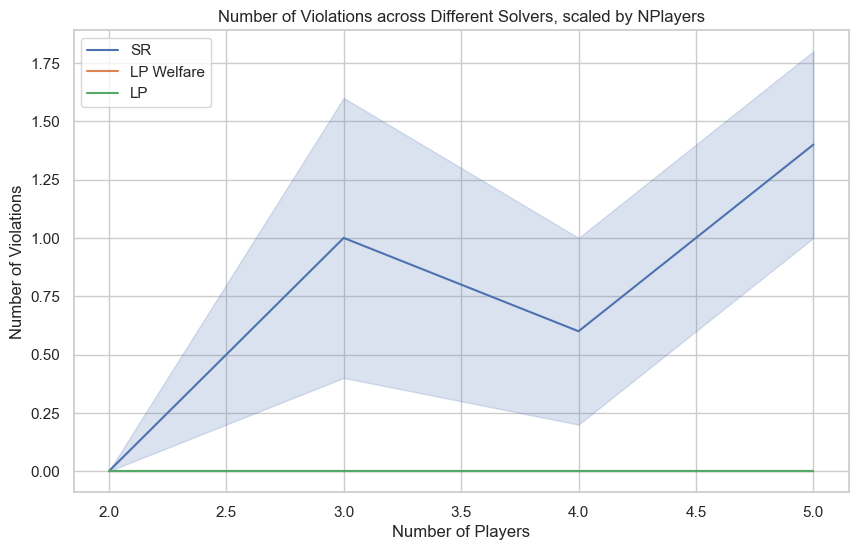

In [59]:
# plot number of violations
sr_nplayers_sr = sr_nplayers[sr_nplayers["Solver"] == "Swap Regret"].copy()
sr_nplayers_lp_welfare = sr_nplayers[sr_nplayers["Solver"] == "Linear Programming-Maximize Welfare"].copy()
sr_nplayers_lp = sr_nplayers[sr_nplayers["Solver"] == "Linear Programming"].copy()
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.lineplot(x="NPlayers", y="NViolations", data=sr_nplayers_sr, label="SR")
sns.lineplot(x="NPlayers", y="NViolations", data=sr_nplayers_lp_welfare, label="LP Welfare")
sns.lineplot(x="NPlayers", y="NViolations", data=sr_nplayers_lp, label="LP")
plt.title("Number of Violations across Different Solvers, scaled by NPlayers")
plt.xlabel("Number of Players")
plt.ylabel("Number of Violations")

Text(0, 0.5, 'Number of Violations')

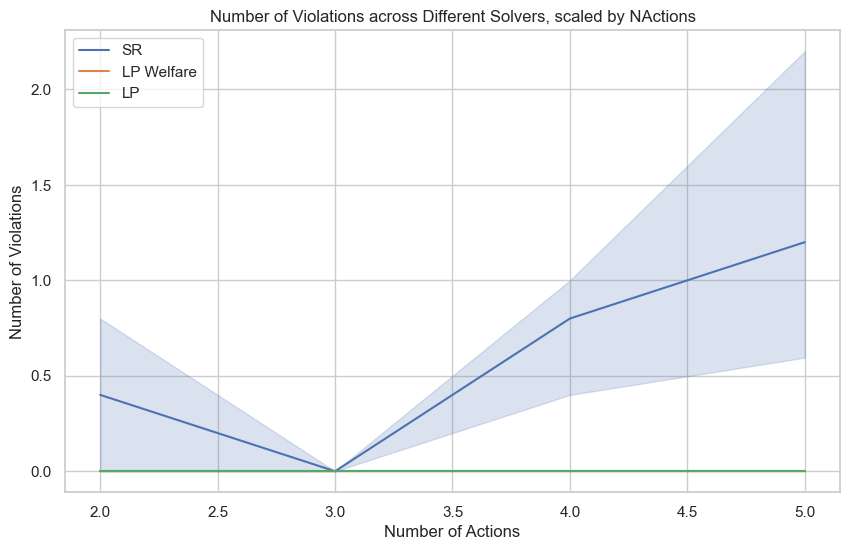

In [58]:
sr_nactions_sr = sr_nactions[sr_nactions["Solver"] == "Swap Regret"].copy()
sr_nactions_lp_welfare = sr_nactions[sr_nactions["Solver"] == "Linear Programming-Maximize Welfare"].copy()
sr_nactions_lp = sr_nactions[sr_nactions["Solver"] == "Linear Programming"].copy()
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.lineplot(x="MaxNActions", y="NViolations", data=sr_nactions_sr, label="SR")
sns.lineplot(x="MaxNActions", y="NViolations", data=sr_nactions_lp_welfare, label="LP Welfare")
sns.lineplot(x="MaxNActions", y="NViolations", data=sr_nactions_lp, label="LP")
plt.title("Number of Violations across Different Solvers, scaled by NActions")
plt.xlabel("Number of Actions")
plt.ylabel("Number of Violations")

Text(0, 0.5, 'Runtime')

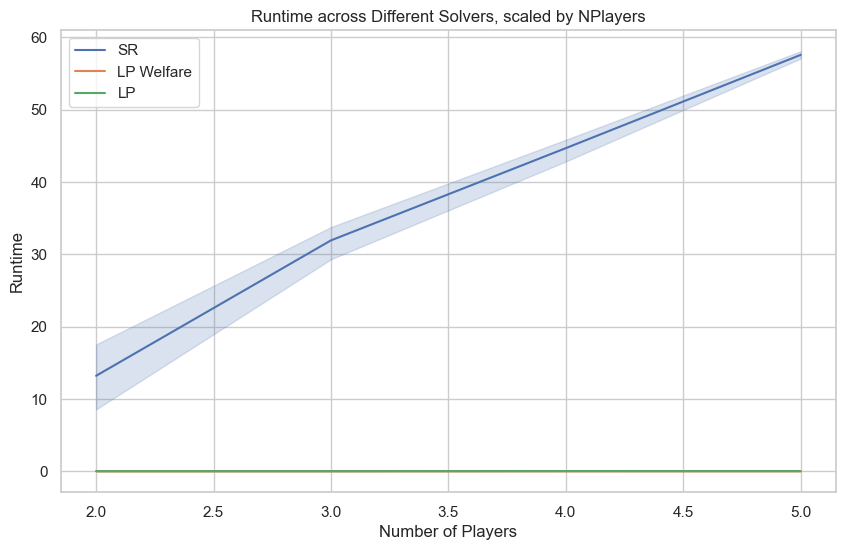

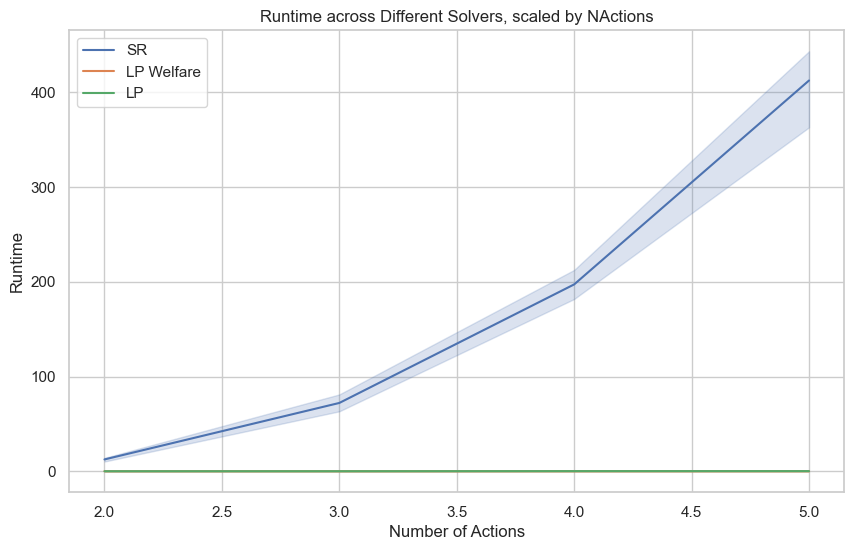

In [57]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.lineplot(x="NPlayers", y="Runtime", data=sr_nplayers_sr, label="SR")
sns.lineplot(x="NPlayers", y="Runtime", data=sr_nplayers_lp_welfare, label="LP Welfare")
sns.lineplot(x="NPlayers", y="Runtime", data=sr_nplayers_lp, label="LP")
plt.title("Runtime across Different Solvers, scaled by NPlayers")
plt.xlabel("Number of Players")
plt.ylabel("Runtime")

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.lineplot(x="MaxNActions", y="Runtime", data=sr_nactions_sr, label="SR")
sns.lineplot(x="MaxNActions", y="Runtime", data=sr_nactions_lp_welfare, label="LP Welfare")
sns.lineplot(x="MaxNActions", y="Runtime", data=sr_nactions_lp, label="LP")
plt.title("Runtime across Different Solvers, scaled by NActions")
plt.xlabel("Number of Actions")
plt.ylabel("Runtime")

Text(0, 0.5, 'Welfare')

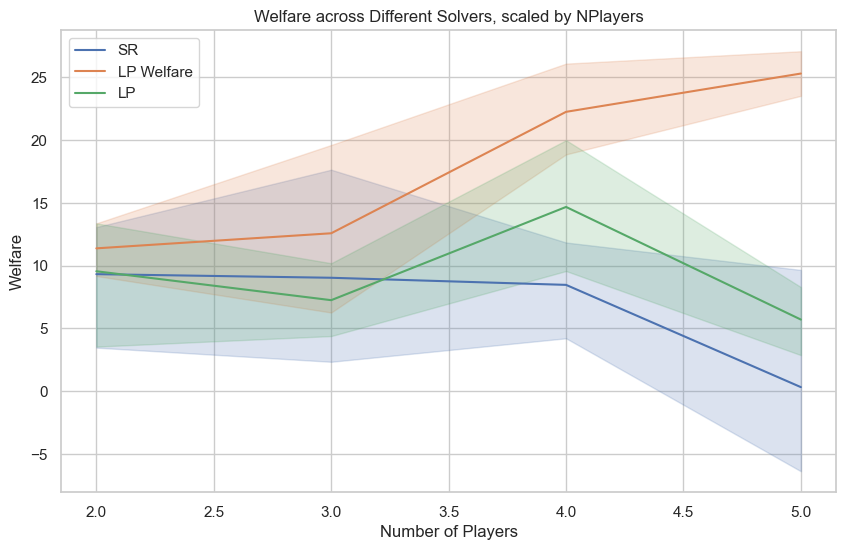

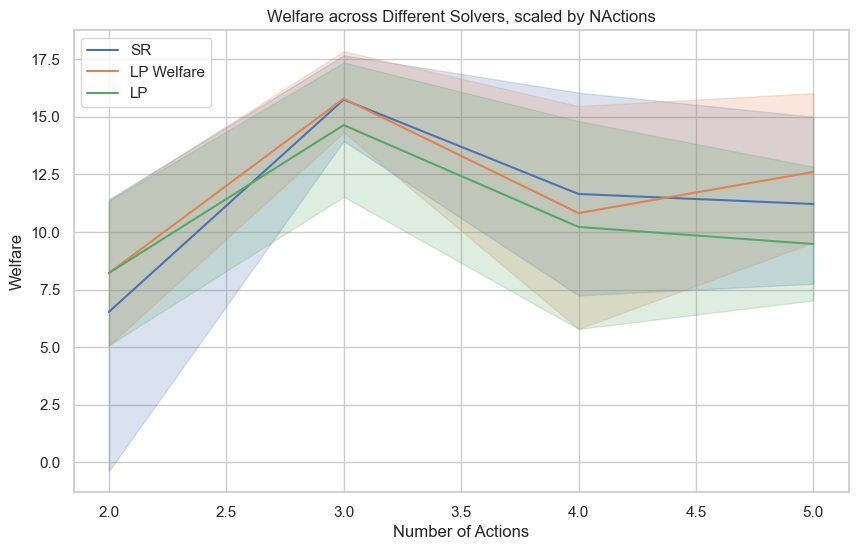

In [56]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.lineplot(x="NPlayers", y="Welfare", data=sr_nplayers_sr, label="SR")
sns.lineplot(x="NPlayers", y="Welfare", data=sr_nplayers_lp_welfare, label="LP Welfare")
sns.lineplot(x="NPlayers", y="Welfare", data=sr_nplayers_lp, label="LP")
plt.title("Welfare across Different Solvers, scaled by NPlayers")
plt.xlabel("Number of Players")
plt.ylabel("Welfare")

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.lineplot(x="MaxNActions", y="Welfare", data=sr_nactions_sr, label="SR")
sns.lineplot(x="MaxNActions", y="Welfare", data=sr_nactions_lp_welfare, label="LP Welfare")
sns.lineplot(x="MaxNActions", y="Welfare", data=sr_nactions_lp, label="LP")
plt.title("Welfare across Different Solvers, scaled by NActions")
plt.xlabel("Number of Actions")
plt.ylabel("Welfare")